## Your task is to find a linear approximation of the function sqrt(1 + x), x belongs to  [0; 1]. 
#### Your homework should contain the following steps:

### a) Generate N = 10,000 random numbers from [0; 1]: x1; x2; ... ; xN belong to [0; 1] ; and then obtain their labels: yi = sqrt(1 + xi), i = 1; 2; ... ;N.

In [1]:
# Import necessary libraries

import random
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# 1. Get here the xi_s: 10,000 random numbers from [0,1]
xi = np.random.rand(10000, 1)

# 2. Find yi_s by giving the values of xi_s:
yi = np.sqrt(1+xi)

In [3]:
print(min(xi), max(xi))
print(xi)
print(yi)

[0.00012576] [0.99982749]
[[0.08982723]
 [0.829545  ]
 [0.31702383]
 ...
 [0.52254122]
 [0.75094767]
 [0.28553974]]
[[1.04394791]
 [1.35260674]
 [1.14761658]
 ...
 [1.23391297]
 [1.32323379]
 [1.13381645]]


In [4]:
# Train, test and validation sets split

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(xi, yi, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train)

[[0.37664075]
 [0.72595895]
 [0.34383905]
 ...
 [0.05672661]
 [0.25708014]
 [0.76846451]]


### b) Do linear regression on your generated data using the Closed Form Solution.

In [5]:
# Add constant for intercept

x_int = sm.add_constant(x_train)
x_int

array([[1.        , 0.37664075],
       [1.        , 0.72595895],
       [1.        , 0.34383905],
       ...,
       [1.        , 0.05672661],
       [1.        , 0.25708014],
       [1.        , 0.76846451]])

In [6]:
# 1. Closed form solution with Manual matrix multiplication:

First = np.dot(np.linalg.inv(np.dot(x_int.T, x_int)), np.dot(x_int.T, y_train))
print(First)

[[1.01315437]
 [0.41147008]]


In [7]:
# 2. Closed form solution using "statsmodels" library:

Second = sm.OLS(y_train, x_int).fit()
print(f'{Second.params}')

[1.01315437 0.41147008]


### c) Do linear regression on your generated data using the Library Sklearn.

In [8]:
# 3. Linear Regression using "sklearn" library:

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(f'Intercept: {regressor.intercept_}, coeff: {regressor.coef_}')

Intercept: [1.01315437], coeff: [[0.41147008]]


### d) Do linear regression on your generated data implementing the Gradient Descent algorithm by yourself.

In [9]:
X_df = pd.DataFrame(x_train)
y_df = pd.DataFrame(y_train)

## Length, or number of observations, in our data
m = len(y_df)

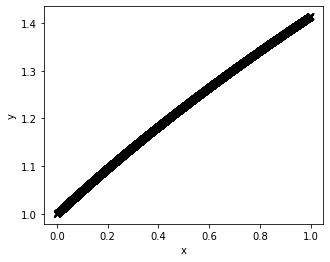

In [10]:
plt.figure(figsize=(5,4))
plt.plot(X_df, y_df, 'kx')
plt.xlabel('x')
plt.ylabel('y');

In [11]:
## Add a columns of 1s as intercept to X
X_df['Intercept'] = 1

## Transform to Numpy arrays for easier matrix math and start w at 0
X = np.array(X_df)
y = np.array(y_df).flatten()
w = np.array([0, 0])

In [12]:
iterations = 3500
alpha = 0.01

In [13]:
def gradient_descent(learning_rate, X, y, iters: int, return_model_result: bool=True):
   
    mse_ = []
    cost_ = []
    w_ = []
    
    n = X.shape[0]
    w = np.ones(X.shape[1])  # Default w0 and w1 ( weights )
    
    for i in range(0, iters):
        predictions = np.dot(X, w)
        loss = predictions - y
        L = np.sum(loss ** 2) / (2 * n)  # cost result
        if i % 100 == 0:
            print(f'Iter {i} | L: {L} | w: {w}')
            
        gradient = np.dot(X.T, loss) / n  
        y_pred = np.dot(X, w)
        mse_.append(mean_squared_error(y, y_pred))
        cost_.append(L)
        w_.append(w)
        w = w - learning_rate * gradient  # this is the part where we update weights
        
    print(f'End Iter: L: {L} | w: {w}')
    y_pred = np.dot(X, w)
    mse_.append(mean_squared_error(y, y_pred))
    cost_.append(L)
    w_.append(w)
        
    return cost_, w_, mse_


#X_ = np.c_[np.ones(X.shape[0]), X]  # insert column
_L, _w, _mse = gradient_descent(learning_rate=alpha, X=X, y=y, iters=iterations)

Iter 0 | L: 0.05454240377202647 | w: [1. 1.]
Iter 100 | L: 0.011524498282619741 | w: [0.87891334 0.84609368]
Iter 200 | L: 0.007284311648136309 | w: [0.82570432 0.81373577]
Iter 300 | L: 0.0061627173202723215 | w: [0.79264601 0.81454591]
Iter 400 | L: 0.005381442437772769 | w: [0.76636972 0.82396024]
Iter 500 | L: 0.0047128632458598345 | w: [0.74307804 0.83518007]
Iter 600 | L: 0.004128604449505975 | w: [0.72164328 0.84635041]
Iter 700 | L: 0.003617070288610351 | w: [0.7016856  0.85699024]
Iter 800 | L: 0.0031691338066333857 | w: [0.68303756 0.86699881]
Iter 900 | L: 0.0027768822834847444 | w: [0.66559487 0.87637912]
Iter 1000 | L: 0.002433392827583642 | w: [0.6492745  0.88516108]
Iter 1100 | L: 0.0021326036323838487 | w: [0.6340028 0.8933802]
Iter 1200 | L: 0.0018692064907216905 | w: [0.619712  0.9010718]
Iter 1300 | L: 0.001638553078279117 | w: [0.60633898 0.90826956]
Iter 1400 | L: 0.0014365729188136492 | w: [0.59382477 0.9150051 ]
Iter 1500 | L: 0.0012597015498364108 | w: [0.582114

In [14]:
# Results of each model

First_Closed_Form = np.dot(X,First)
First_Closed_Form

Second_Closed_Form_2 = np.dot(X,Second.params)
Second_Closed_Form_2

Third = np.array([1.01286796, 0.41221033])
Third
Third_sklearn = np.dot(X,Third)
Third_sklearn
min(Third_sklearn)

0.41233771127112645

In [15]:
Fourth = np.array([0.45873713, 0.9878848])

Fourth_GD = np.dot(X,Fourth)
Fourth_GD

array([1.1606639 , 1.32090912, 1.14561654, ..., 1.0139074 , 1.10581701,
       1.340408  ])

### e) Sketch the graphs of all approximations on one graph.

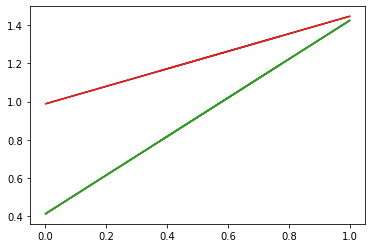

In [16]:
plt.plot(x_train, First_Closed_Form)
plt.plot(x_train, Second_Closed_Form_2)
plt.plot(x_train, Third_sklearn)
plt.plot(x_train, Fourth_GD);

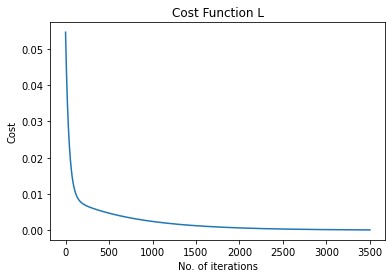

In [17]:
#Plot the cost function for Gradient Descent
plt.title('Cost Function L')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(_L)
plt.show()

### f) Compare all solutions with the First degree Taylor approximation of the function sqrt(1 + x).

In [18]:
# The first degree Taylor approximation is equal to y = 1 + (1/2)*x

# 1. Get here the xi_s: 10,000 random numbers from [0,1]
Taylor_xi = np.random.rand(10000, 1)

# 2. Find yi_s by giving the values of xi_s:
Taylor_yi = 1 + (1/2) * Taylor_xi

In [19]:
print(min(Taylor_xi), max(Taylor_xi))
print(Taylor_xi)
print(Taylor_yi)

[7.09160479e-05] [0.99999057]
[[0.52508068]
 [0.51707847]
 [0.1436234 ]
 ...
 [0.21723653]
 [0.30587268]
 [0.65827694]]
[[1.26254034]
 [1.25853923]
 [1.0718117 ]
 ...
 [1.10861826]
 [1.15293634]
 [1.32913847]]


In [20]:
# Train, test and validation sets split

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

Taylor_x_train, Taylor_x_test, Taylor_y_train, Taylor_y_test = train_test_split(Taylor_xi, 
                                                                                Taylor_yi, test_size=1 - train_ratio)

Taylor_x_val, Taylor_x_test, Taylor_y_val, Taylor_y_test = train_test_split(
    Taylor_x_test, Taylor_y_test, test_size = test_ratio/(test_ratio + validation_ratio)) 

print(Taylor_x_train)

[[0.27288101]
 [0.39403533]
 [0.57726621]
 ...
 [0.77448844]
 [0.905002  ]
 [0.747627  ]]


### Taylor's b)

In [21]:
import statsmodels.api as sm

# Add constant for intercept

Taylor_x_int = sm.add_constant(Taylor_x_train)
Taylor_x_int

array([[1.        , 0.27288101],
       [1.        , 0.39403533],
       [1.        , 0.57726621],
       ...,
       [1.        , 0.77448844],
       [1.        , 0.905002  ],
       [1.        , 0.747627  ]])

In [22]:
# 1. Closed form solution with Manual matrix multiplication:

Taylor_First = np.dot(np.linalg.inv(np.dot(Taylor_x_int.T, Taylor_x_int)), np.dot(Taylor_x_int.T, Taylor_y_train))
print(Taylor_First)

[[1. ]
 [0.5]]


In [23]:
# 2. Closed form solution using "statsmodels" library:

Taylor_Second = sm.OLS(Taylor_y_train, Taylor_x_int).fit()
print(f'{Taylor_Second.params}')

[1.  0.5]


### Taylor's c)

In [24]:
# 3. Linear Regression using "sklearn" library:

Taylor_regressor = LinearRegression()
Taylor_regressor.fit(Taylor_x_train, Taylor_y_train)

print(f'Intercept: {Taylor_regressor.intercept_}, coeff: {Taylor_regressor.coef_}')

Intercept: [1.], coeff: [[0.5]]


### Taylor's d)

In [25]:
Taylor_X_df = pd.DataFrame(Taylor_x_train)
Taylor_y_df = pd.DataFrame(Taylor_y_train)

## Length, or number of observations, in our data
m = len(Taylor_y_df)

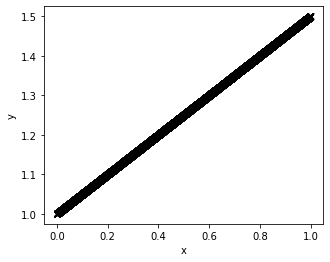

In [26]:
plt.figure(figsize=(5,4))
plt.plot(Taylor_X_df, Taylor_y_df, 'kx')
plt.xlabel('x')
plt.ylabel('y');

In [27]:
## Add a columns of 1s as intercept to X
Taylor_X_df['Intercept'] = 1

## Transform to Numpy arrays for easier matrix math and start w at 0
Taylor_X = np.array(Taylor_X_df)
Taylor_y = np.array(Taylor_y_df).flatten()
w = np.array([0, 0])

In [28]:
def gradient_descent(learning_rate, X, y, iters: int, return_model_result: bool=True):
   
    mse_ = []
    cost_ = []
    w_ = []
    
    n = X.shape[0]
    w = np.ones(X.shape[1])  # Default w0 and w1 ( weights )
    
    for i in range(0, iters):
        predictions = np.dot(X, w)
        loss = predictions - y
        L = np.sum(loss ** 2) / (2 * n)  # cost result
        if i % 100 == 0:
            print(f'Iter {i} | L: {L} | w: {w}')
            
        gradient = np.dot(X.T, loss) / n  
        y_pred = np.dot(X, w)
        mse_.append(mean_squared_error(y, y_pred))
        cost_.append(L)
        w_.append(w)
        w = w - learning_rate * gradient  # this is the part where we update weights
        
    print(f'End Iter: L: {L} | w: {w}')
    y_pred = np.dot(X, w)
    mse_.append(mean_squared_error(y, y_pred))
    cost_.append(L)
    w_.append(w)
        
    return cost_, w_, mse_


#X_ = np.c_[np.ones(X.shape[0]), X]  # insert column
_L, _w, _mse = gradient_descent(learning_rate=alpha, X=Taylor_X, y=Taylor_y, iters=3100)

Iter 0 | L: 0.04174266328361421 | w: [1. 1.]
Iter 100 | L: 0.00824821178376907 | w: [0.89512379 0.86270277]
Iter 200 | L: 0.005042077909830539 | w: [0.84994667 0.83300291]
Iter 300 | L: 0.004261254224883261 | w: [0.82240098 0.83275407]
Iter 400 | L: 0.0037330432845804743 | w: [0.8007014  0.84021194]
Iter 500 | L: 0.0032809468700953737 | w: [0.78150547 0.8493481 ]
Iter 600 | L: 0.002884431546658493 | w: [0.76382719 0.85851184]
Iter 700 | L: 0.0025359010753196764 | w: [0.74734066 0.8672706 ]
Iter 800 | L: 0.002229489100387351 | w: [0.73190712 0.87552956]
Iter 900 | L: 0.001960101157880532 | w: [0.71744293 0.88328642]
Iter 1000 | L: 0.0017232632425643088 | w: [0.70388265 0.89056318]
Iter 1100 | L: 0.0015150423210694717 | w: [0.69116851 0.89738716]
Iter 1200 | L: 0.0013319806157587194 | w: [0.67924737 0.90378589]
Iter 1300 | L: 0.001171038152601574 | w: [0.66806966 0.90978568]
Iter 1400 | L: 0.0010295422760854811 | w: [0.65758899 0.91541135]
Iter 1500 | L: 0.0009051432661630779 | w: [0.647

In [29]:
# Results of each model

Taylor_First_Closed_Form = np.dot(Taylor_X,Taylor_First)
Taylor_First_Closed_Form

Taylor_Second_Closed_Form_2 = np.dot(Taylor_X,Taylor_Second.params)
Taylor_Second_Closed_Form_2

Taylor_Third = np.array([1., 0.5])
Taylor_Third
Taylor_Third_sklearn = np.dot(Taylor_X,Taylor_Third)
Taylor_Third_sklearn
min(Taylor_Third_sklearn)

0.5004248266439107

In [30]:
Taylor_Fourth = np.array([0.54956398, 0.97344814])

Taylor_Fourth_GD = np.dot(Taylor_X, Taylor_Fourth)
Taylor_Fourth_GD

array([1.12341371, 1.18999576, 1.29069286, ..., 1.39907909, 1.47080464,
       1.38431701])

### Taylor's e)

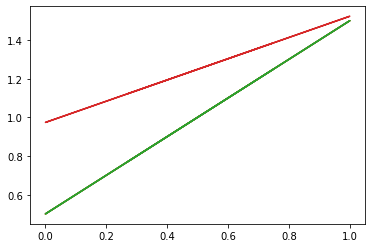

In [31]:
plt.plot(Taylor_x_train, Taylor_First_Closed_Form)
plt.plot(Taylor_x_train, Taylor_Second_Closed_Form_2)
plt.plot(Taylor_x_train, Taylor_Third_sklearn)
plt.plot(Taylor_x_train, Taylor_Fourth_GD);

In case of sqrt(1+x) function approximation we performed linear regression using 3 (statsmodel library not included) models: 

1. Closed form solution (also via statsmodel library), 
2. Used "sklear" library
3. Implemented the Gradient Descent from scratch.

For the 1. and 2. we got the same w0 and w1 weights:  w0 = 1.01298317, w1 = 0.41196442, for the third one we got the following results: w0 = 0.9878848, w1 = 0.45873713 (*)

As we know that the First degree Taylor's approximation of the function sqrt(1+x) = 1 + (1/2)*x.
Let's see what we have in case of this approximation:

For 1. and 2. cases the w0 and w1 are w0 = 1. , w1 = 0.5. But in case of the GD we have w0 = 0.97344814, w1 = 0.54956398 which is quiet closer to the previous 3. result (*). And previous 1., 2. results are closer to the Taylor's case 1. and 2. results. 